In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("customer_analytics.csv")
df.head()


,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


In [4]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


In [5]:
df.shape

(255, 14)


## Introduction
This dataset contains customer analytics data for a retail business.  
Each row represents one individual customer.
The dataset includes demographic features such as Age, Gender, City, Education, and Marital Status, along with behavioral and financial features like Annual Income, Spending Score, Purchase Frequency, Online Visits per Month, Returned Items, Preferred Device, and Last Purchase Amount.
The objective of this analysis is to explore customer behavior patterns, understand relationships between income and spending habits, and identify key factors that influence purchasing behavior.

In [6]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [8]:
df.drop(columns=['CustomerID'], inplace=True)

In [9]:
df.duplicated().sum()

np.int64(5)

In [10]:
df.drop_duplicates(inplace=True)

## Data Cleaning Summary
- Checked for missing values using .isnull().sum().
- No missing values were found in the dataset.
- Checked for duplicate rows and removed them if present.
- The dataset is clean and ready for analysis.

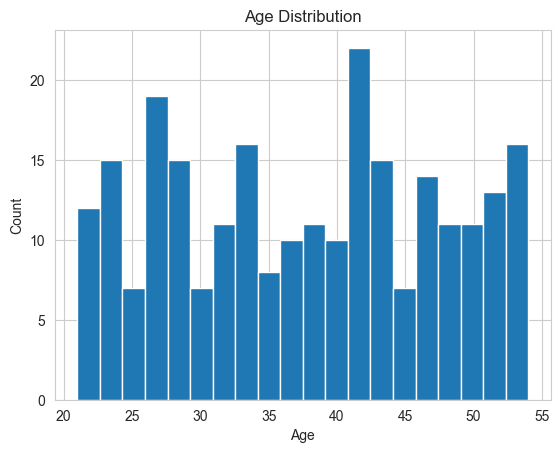

In [11]:
plt.figure()
plt.hist(df['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Most customers fall within the young to middle-aged category. 
This suggests the business mainly attracts working-age individuals.

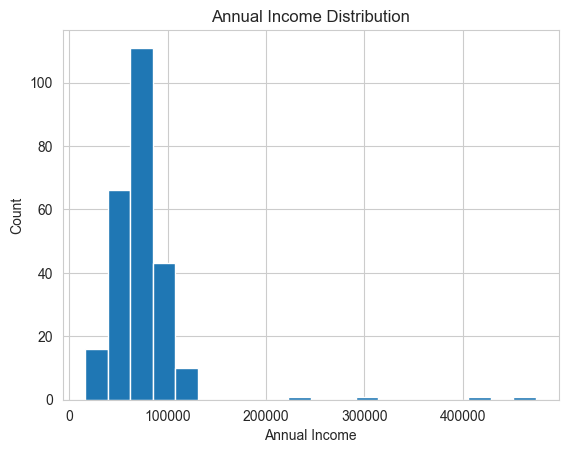

In [12]:
plt.figure()
plt.hist(df['AnnualIncome'], bins=20)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

Income levels are moderately distributed, with most customers belonging to the mid-income range.
There are fewer customers in the extreme low and high-income groups.

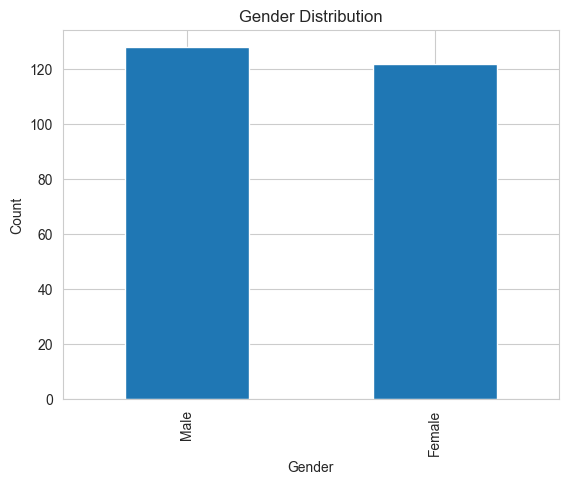

In [13]:
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

The dataset shows a relatively balanced gender distribution.
Both male and female customers contribute significantly to the customer base.

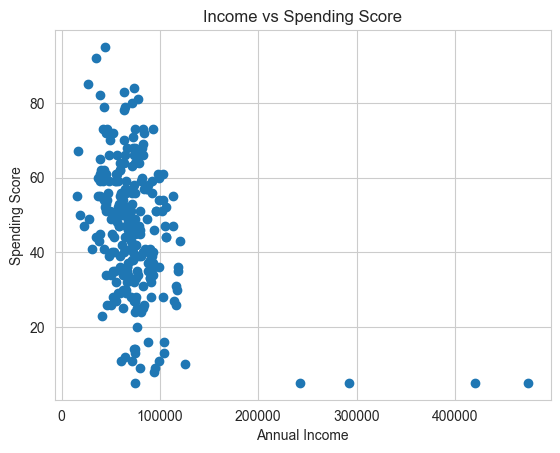

In [14]:
plt.figure()
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()

Spending behavior varies across income levels.
This suggests that higher income does not always guarantee higher spending.

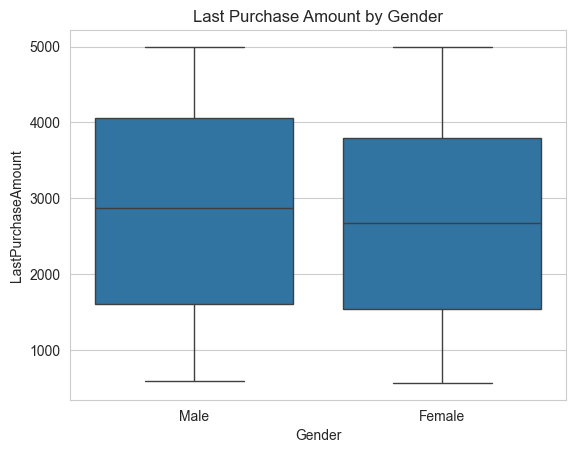

In [15]:
sns.boxplot(x='Gender', y='LastPurchaseAmount', data=df)
plt.title("Last Purchase Amount by Gender")
plt.show()

The last purchase amount varies slightly between genders.
However, the difference is not significantly large.

In [16]:
corr = df.corr(numeric_only=True)


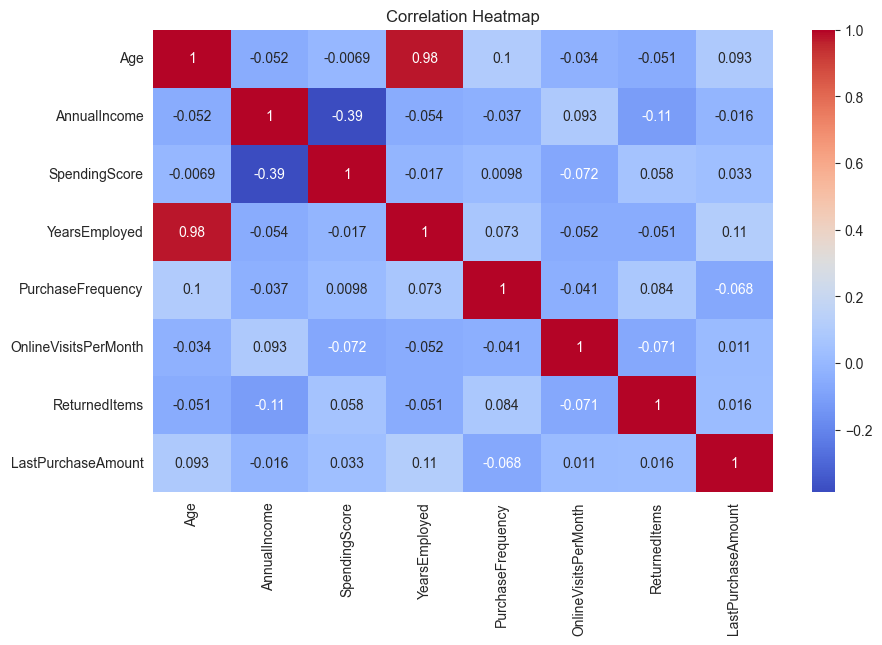

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows relationships between numerical variables.
Income and spending-related features show moderate correlation.
Some variables have weak relationships, indicating diverse customer behavior patterns.

## Executive Summary

1. Most customers belong to the young and middle-income segments.
2. Spending patterns differ significantly even among customers with similar income levels.
3. Income has moderate correlation with purchase-related variables, suggesting purchasing power influences buying behavior.

Overall, customer demographics and financial factors both play an important role in purchasing patterns.

In [1]:
import os
os.getcwd()


'C:\\Users\\HP\\Day20_MiniProject_EDA'

In [2]:
!explorer .
    